<a href="https://colab.research.google.com/github/SurekhaBerlin/Pizza-price-prediction-using-ML/blob/main/Pizza_Price_Prediction_using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing Libraries

In [1]:
# Importing all the important libraries first

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


## STEP 2: Importing the Data

In [2]:
main_df = pd.read_csv("pizza_v2.csv")
df = main_df.copy()

## STEP 3: Data Understanding

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
# Checking the shape of the dataset

df.shape

(129, 9)

In [5]:
# Checking the basic information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
# Number of unique values present in each feature column

df.nunique()

,0
company,5
price_rupiah,43
diameter,12
topping,12
variant,20
size,6
extra_sauce,2
extra_cheese,2
extra_mushrooms,2


In [7]:
df.isna().any()

,0
company,False
price_rupiah,False
diameter,False
topping,False
variant,False
size,False
extra_sauce,False
extra_cheese,False
extra_mushrooms,False


In [8]:
df.isna().sum()

,0
company,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0
extra_mushrooms,0


In [9]:
# Descriptive Statistics

df.describe().T

,count,unique,top,freq
company,129,5,C,30
price_rupiah,129,43,"Rp72,000",11
diameter,129,12,12 inch,49
topping,129,12,chicken,29
variant,129,20,classic,30
size,129,6,medium,41
extra_sauce,129,2,yes,76
extra_cheese,129,2,yes,86
extra_mushrooms,129,2,yes,72


In [10]:
df.dtypes

,0
company,object
price_rupiah,object
diameter,object
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


## STEP 4 : Data Cleaning

In [11]:
# Counting Duplicates
duplicate_count = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 2


## STEP 5 : Data Preprocessing

In [12]:
# We want to remove the inch and Rp from the value
df.rename({'price_rupiah': 'price'},axis = 1,inplace = True)

In [13]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
df['price']=df['price'].str.replace('Rp','')
df['price']=df['price'].str.replace(',','')

In [15]:
df['price']=pd.to_numeric(df['price'],errors = 'coerce')

In [16]:
df['diameter']=df['diameter'].str.replace('inch','')
df['diameter']=pd.to_numeric(df['diameter'],errors = 'coerce')

In [17]:

df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [18]:
def convert(value):
  return  value * 0.0054

In [19]:
df['price'] = df['price'].apply(convert)

In [20]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [21]:
df['price']= df['price'].astype(int)

In [22]:
df['company'].value_counts()

,count
company,
C,30
E,30
A,25
B,24
D,20


## STEP 6: Exploratory Data Analysis

## Univariate Analysis

In [23]:
sns.set_style('whitegrid')

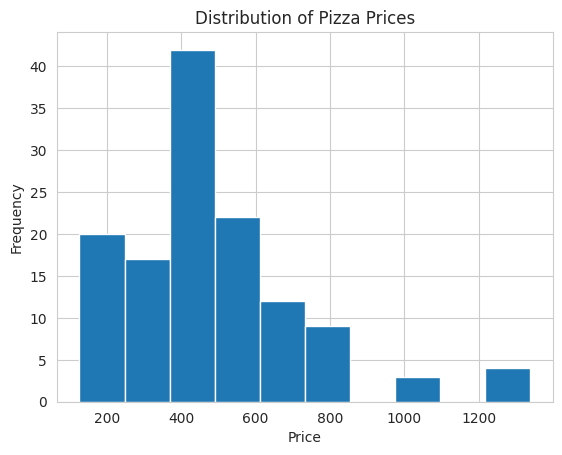

In [24]:
plt.hist(df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Pizza Prices')
plt.show()

<Axes: xlabel='diameter', ylabel='count'>

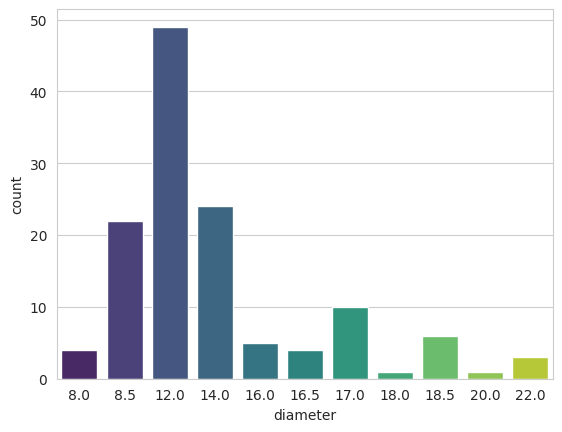

In [25]:
sns.countplot(x='diameter',data=df,palette='viridis')

<Axes: xlabel='count', ylabel='topping'>

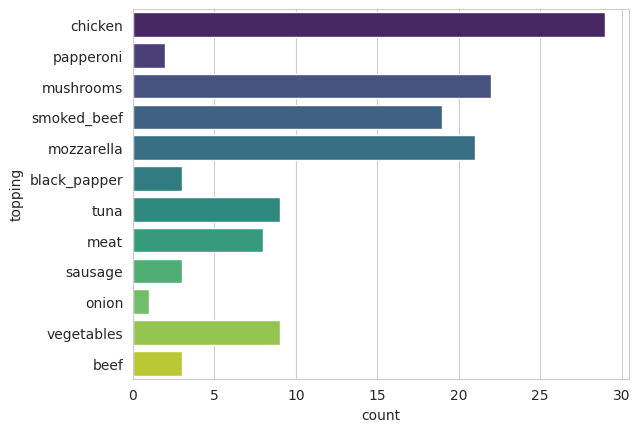

In [26]:
sns.countplot(y='topping',data=df,palette='viridis')

Price Distribution

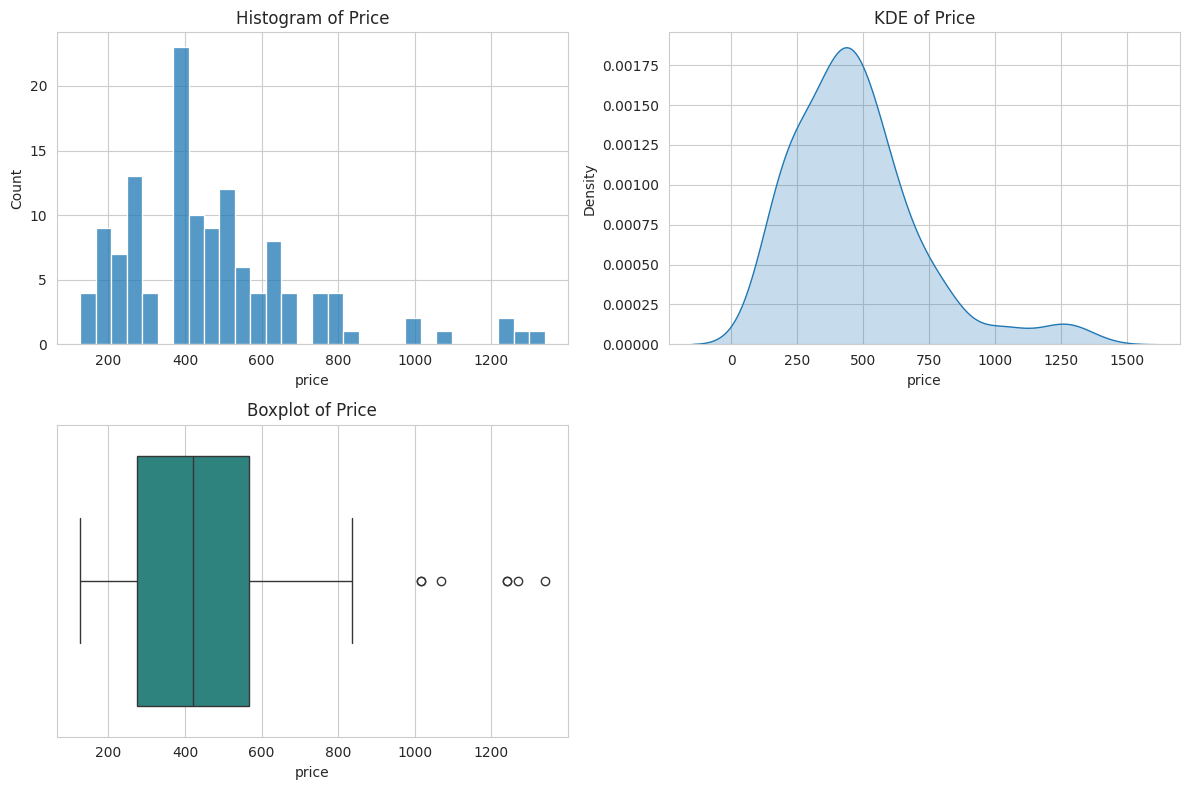

In [27]:
# Checking and visualizing the type of distribution of a feature column
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'price' column exists and is numeric
if 'price' in df.columns:
    # Ensure 'price' is a numeric column
    if pd.api.types.is_numeric_dtype(df['price']):
        # Set up the figure size
        plt.figure(figsize=(12, 8))

        # Plot Histogram with 'viridis' color palette
        plt.subplot(2, 2, 1)
        sns.histplot(df['price'], kde=False,  bins=30, palette='viridis')
        plt.title('Histogram of Price')

        # Plot KDE plot
        plt.subplot(2, 2, 2)
        sns.kdeplot(df['price'], shade=True,  palette='viridis')
        plt.title('KDE of Price')

        # Plot Boxplot
        plt.subplot(2, 2, 3)
        sns.boxplot(x=df['price'], palette='viridis')
        plt.title('Boxplot of Price')

        # Show the plots
        plt.tight_layout()
        plt.show()

    else:
        print("'price' column is not numeric.")
else:
    print("Column 'price' does not exist in the DataFrame.")


Diameter Distribution

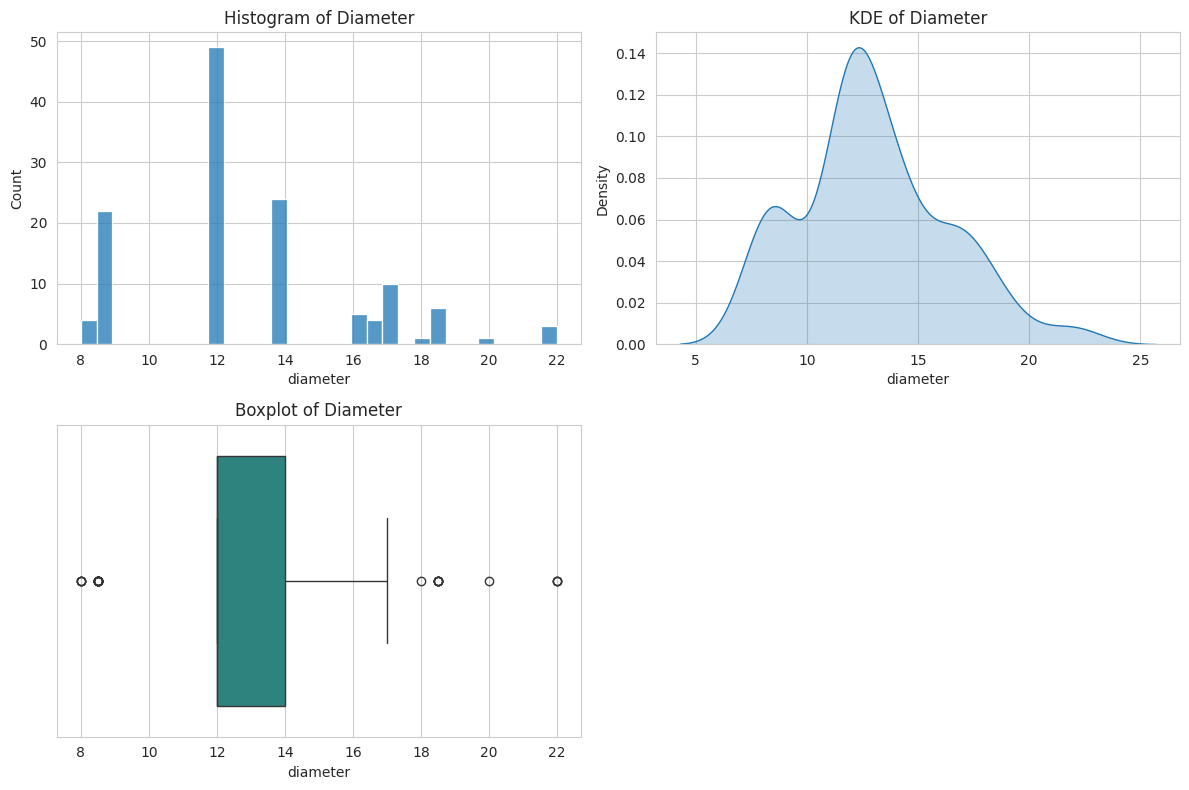

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'diameter' column exists and is numeric
if 'diameter' in df.columns:
    # Ensure 'diameter' is a numeric column
    if pd.api.types.is_numeric_dtype(df['diameter']):
        # Set up the figure size
        plt.figure(figsize=(12, 8))

        # Plot Histogram with 'viridis' color palette
        plt.subplot(2, 2, 1)
        sns.histplot(df['diameter'], kde=False, bins=30, palette='viridis')
        plt.title('Histogram of Diameter')

        # Plot KDE plot
        plt.subplot(2, 2, 2)
        sns.kdeplot(df['diameter'], shade=True, palette='viridis')
        plt.title('KDE of Diameter')

        # Plot Boxplot
        plt.subplot(2, 2, 3)
        sns.boxplot(x=df['diameter'],  palette='viridis')
        plt.title('Boxplot of Diameter')

        # Show the plots
        plt.tight_layout()
        plt.show()

    else:
        print("'diameter' column is not numeric.")
else:
    print("Column 'diameter' does not exist in the DataFrame.")


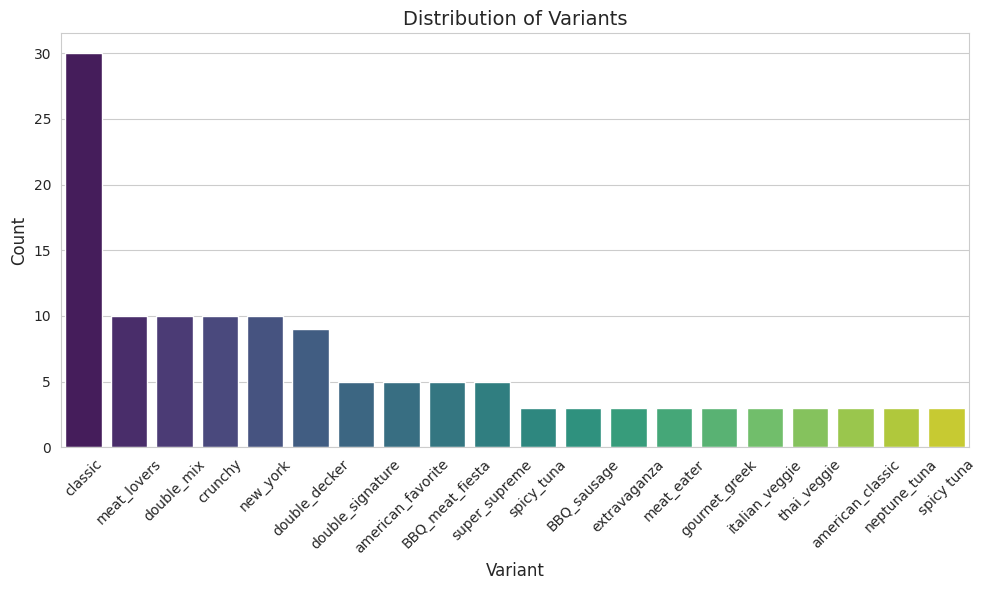

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))
# Get the order of categories based on the count (descending order)
order = df['variant'].value_counts().index
# Plot the distribution of 'variant' as a bar chart using a categorical palette (viridis)
sns.countplot(x='variant', data=df, palette='viridis',order = order)

# Add labels and title
plt.xlabel('Variant', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Variants', fontsize=14)  # Title of the plot
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


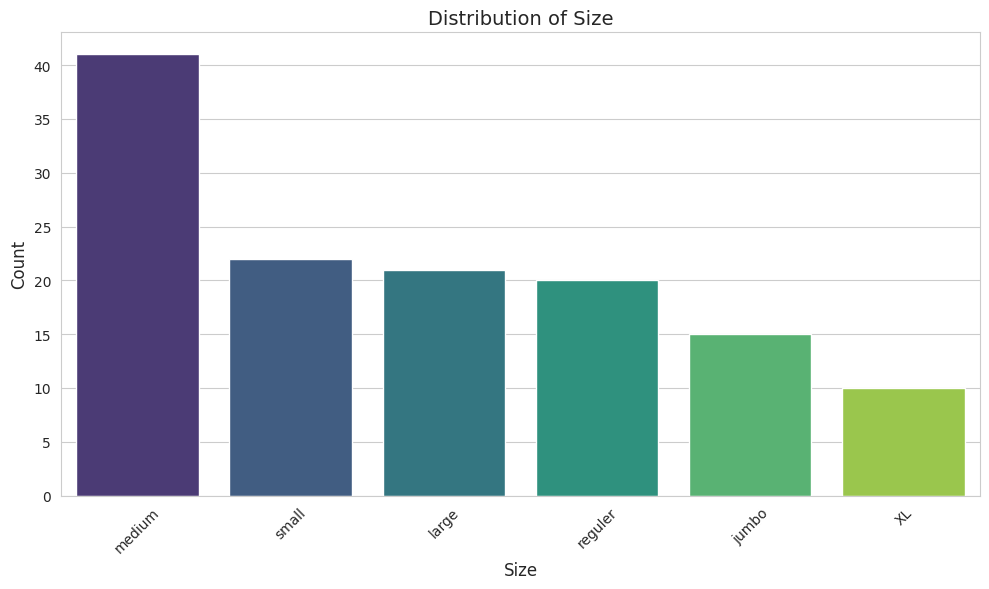

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))
# Get the order of categories based on the count (descending order)
order = df['size'].value_counts().index
# Plot the distribution of 'variant' as a bar chart using a categorical palette (viridis)
sns.countplot(x='size', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Size', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Size', fontsize=14)  # Title of the plot
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


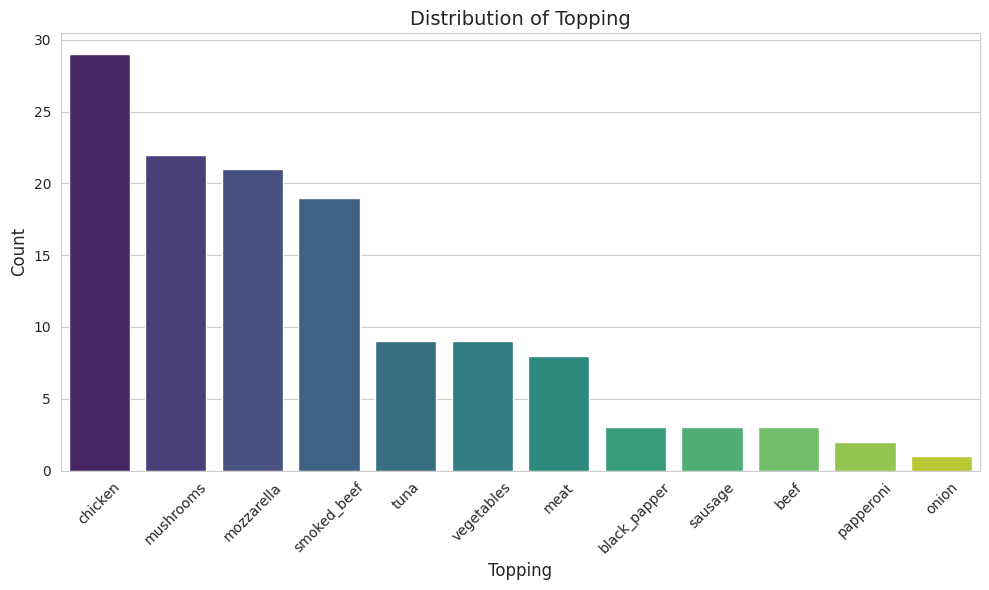

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))

# Get the order of categories based on the count (descending order)
order = df['topping'].value_counts().index

# Plot the distribution of 'topping' as a bar chart using a discrete color palette (e.g., 'Set2')
sns.countplot(x='topping', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Topping', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Topping', fontsize=14)  # Title of the plot

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


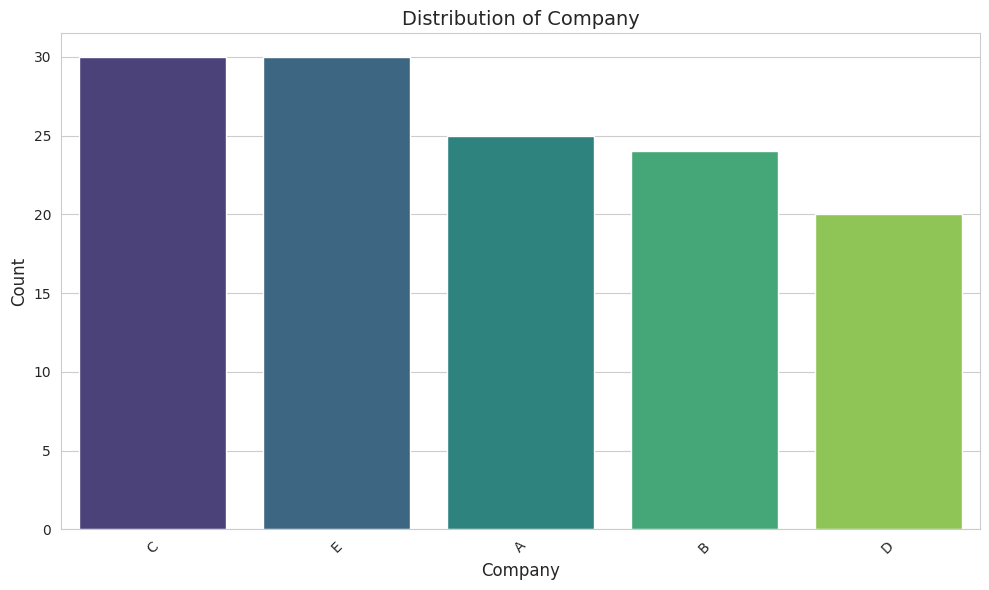

In [32]:

# Set up the figure size
plt.figure(figsize=(10, 6))

# Get the order of categories based on the count (descending order)
order = df['company'].value_counts().index

# Plot the distribution of 'topping' as a bar chart using a discrete color palette (e.g., 'Set2')
sns.countplot(x='company', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Company', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Company', fontsize=14)  # Title of the plot

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


In [33]:
df[df['price'].max() == df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [34]:
df[df['size']=='jumbo']['diameter'].head()

,diameter
0,22.0
1,20.0
4,18.0
5,18.5
6,16.0


In [35]:
df[df['size']=='jumbo']['diameter'].value_counts()

,count
diameter,
18.5,6
16.0,4
22.0,3
20.0,1
18.0,1


In [36]:
df[df['size']=='XL']['diameter'].head()

,diameter
29,17.0
35,17.0
41,17.0
47,17.0
93,17.0


## Removing the Outliers

In [37]:
df[(df['size'] == 'jumbo') & (df['diameter'] <= 16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [38]:
df.drop(df[(df['size'] == 'jumbo') & (df['diameter'] <= 16)].index, inplace=True)

Categorical Analysis

Bivariate Analysis

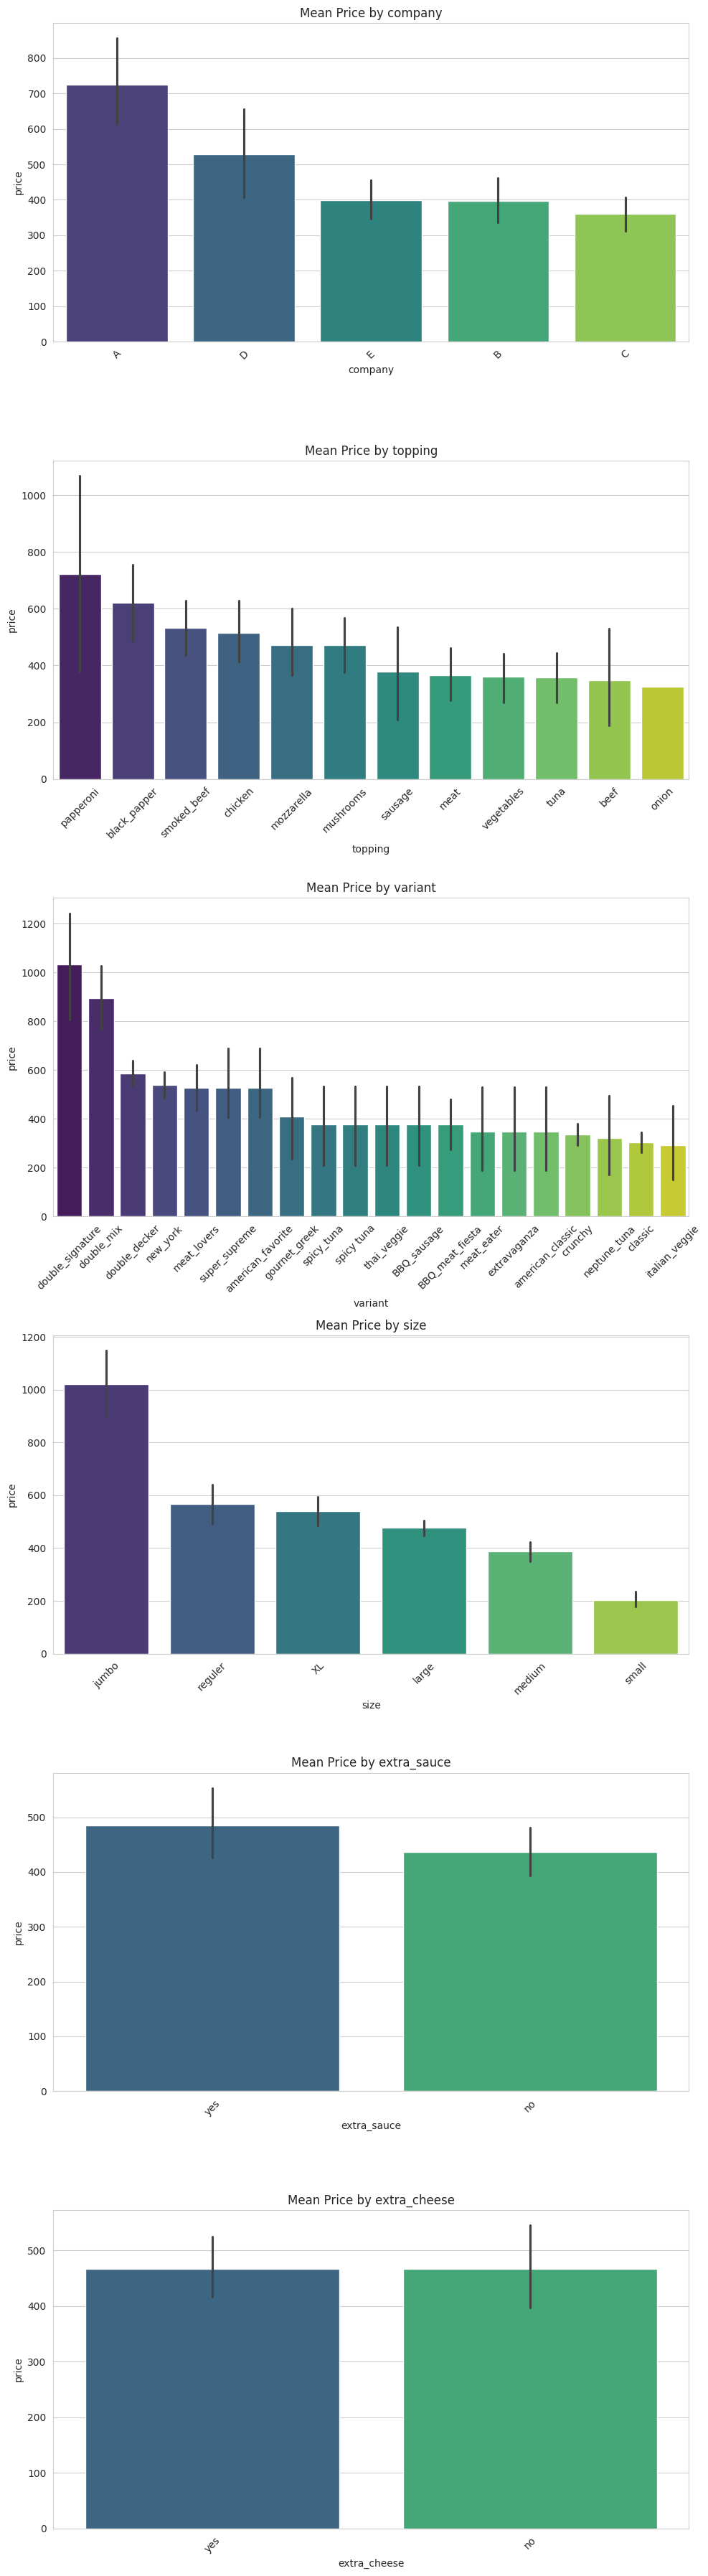

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define the categorical variables
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# Set up the figure and axes for subplots
fig, axs = plt.subplots(len(cat_vars), 1, figsize=(10, 6 * len(cat_vars)))

# Loop through each categorical variable and plot
for i, var in enumerate(cat_vars):
    # Calculate the mean price by category
    mean_prices = df.groupby(var)['price'].mean().sort_values(ascending=False).index

    # Create the bar plot with sorted categories in descending order
    sns.barplot(x=var, y='price', data=df, ax=axs[i], estimator=np.mean, palette='viridis', order=mean_prices)

    # Rotate x-axis labels for readability
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f'Mean Price by {var}')  # Set title for each plot

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


## STEP 7 : Label Encoding

In [40]:
for col in df.select_dtypes(include=[object]).columns:
   print(f"{col}: {df[col].unique()}")

company: ['A' 'B' 'C' 'D' 'E']
topping: ['chicken' 'papperoni' 'mushrooms' 'smoked_beef' 'mozzarella'
 'black_papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
variant: ['double_signature' 'american_favorite' 'super_supreme' 'meat_lovers'
 'double_mix' 'classic' 'crunchy' 'new_york' 'double_decker' 'spicy_tuna'
 'BBQ_meat_fiesta' 'BBQ_sausage' 'extravaganza' 'meat_eater'
 'gournet_greek' 'italian_veggie' 'thai_veggie' 'american_classic'
 'neptune_tuna' 'spicy tuna']
size: ['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
extra_sauce: ['yes' 'no']
extra_cheese: ['yes' 'no']
extra_mushrooms: ['no' 'yes']


In [41]:
for col in df.select_dtypes(include=['object']).columns:
    lable_encoder = preprocessing.LabelEncoder()
    lable_encoder.fit(df[col].unique())
    df[col]=lable_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

company: [0 1 2 3 4]
topping: [ 2  7  5  9  4  1 10  3  8  6 11  0]
variant: [ 8  3 18 13  7  4  5 15  6 17  0  1  9 12 10 11 19  2 14 16]
size: [1 4 5 3 2 0]
extra_sauce: [1 0]
extra_cheese: [1 0]
extra_mushrooms: [0 1]


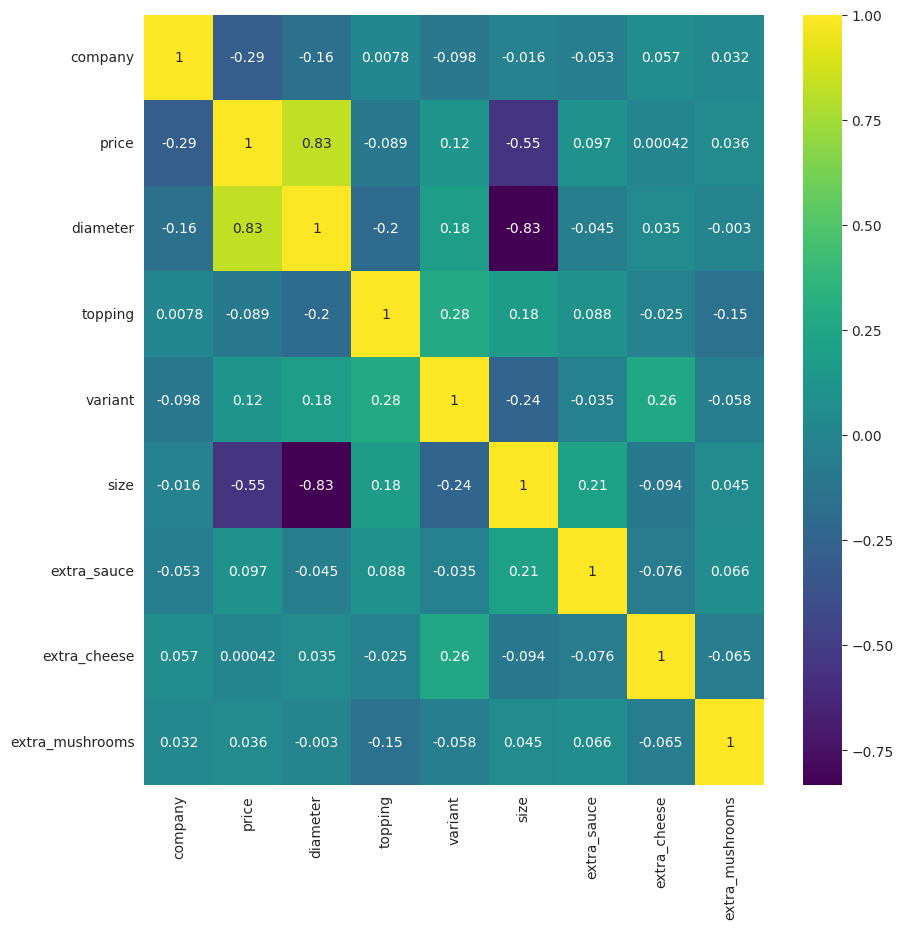

In [42]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create the heatmap with the viridis color palette
sns.heatmap(df.corr(), fmt='.2g', annot=True, cmap='viridis')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

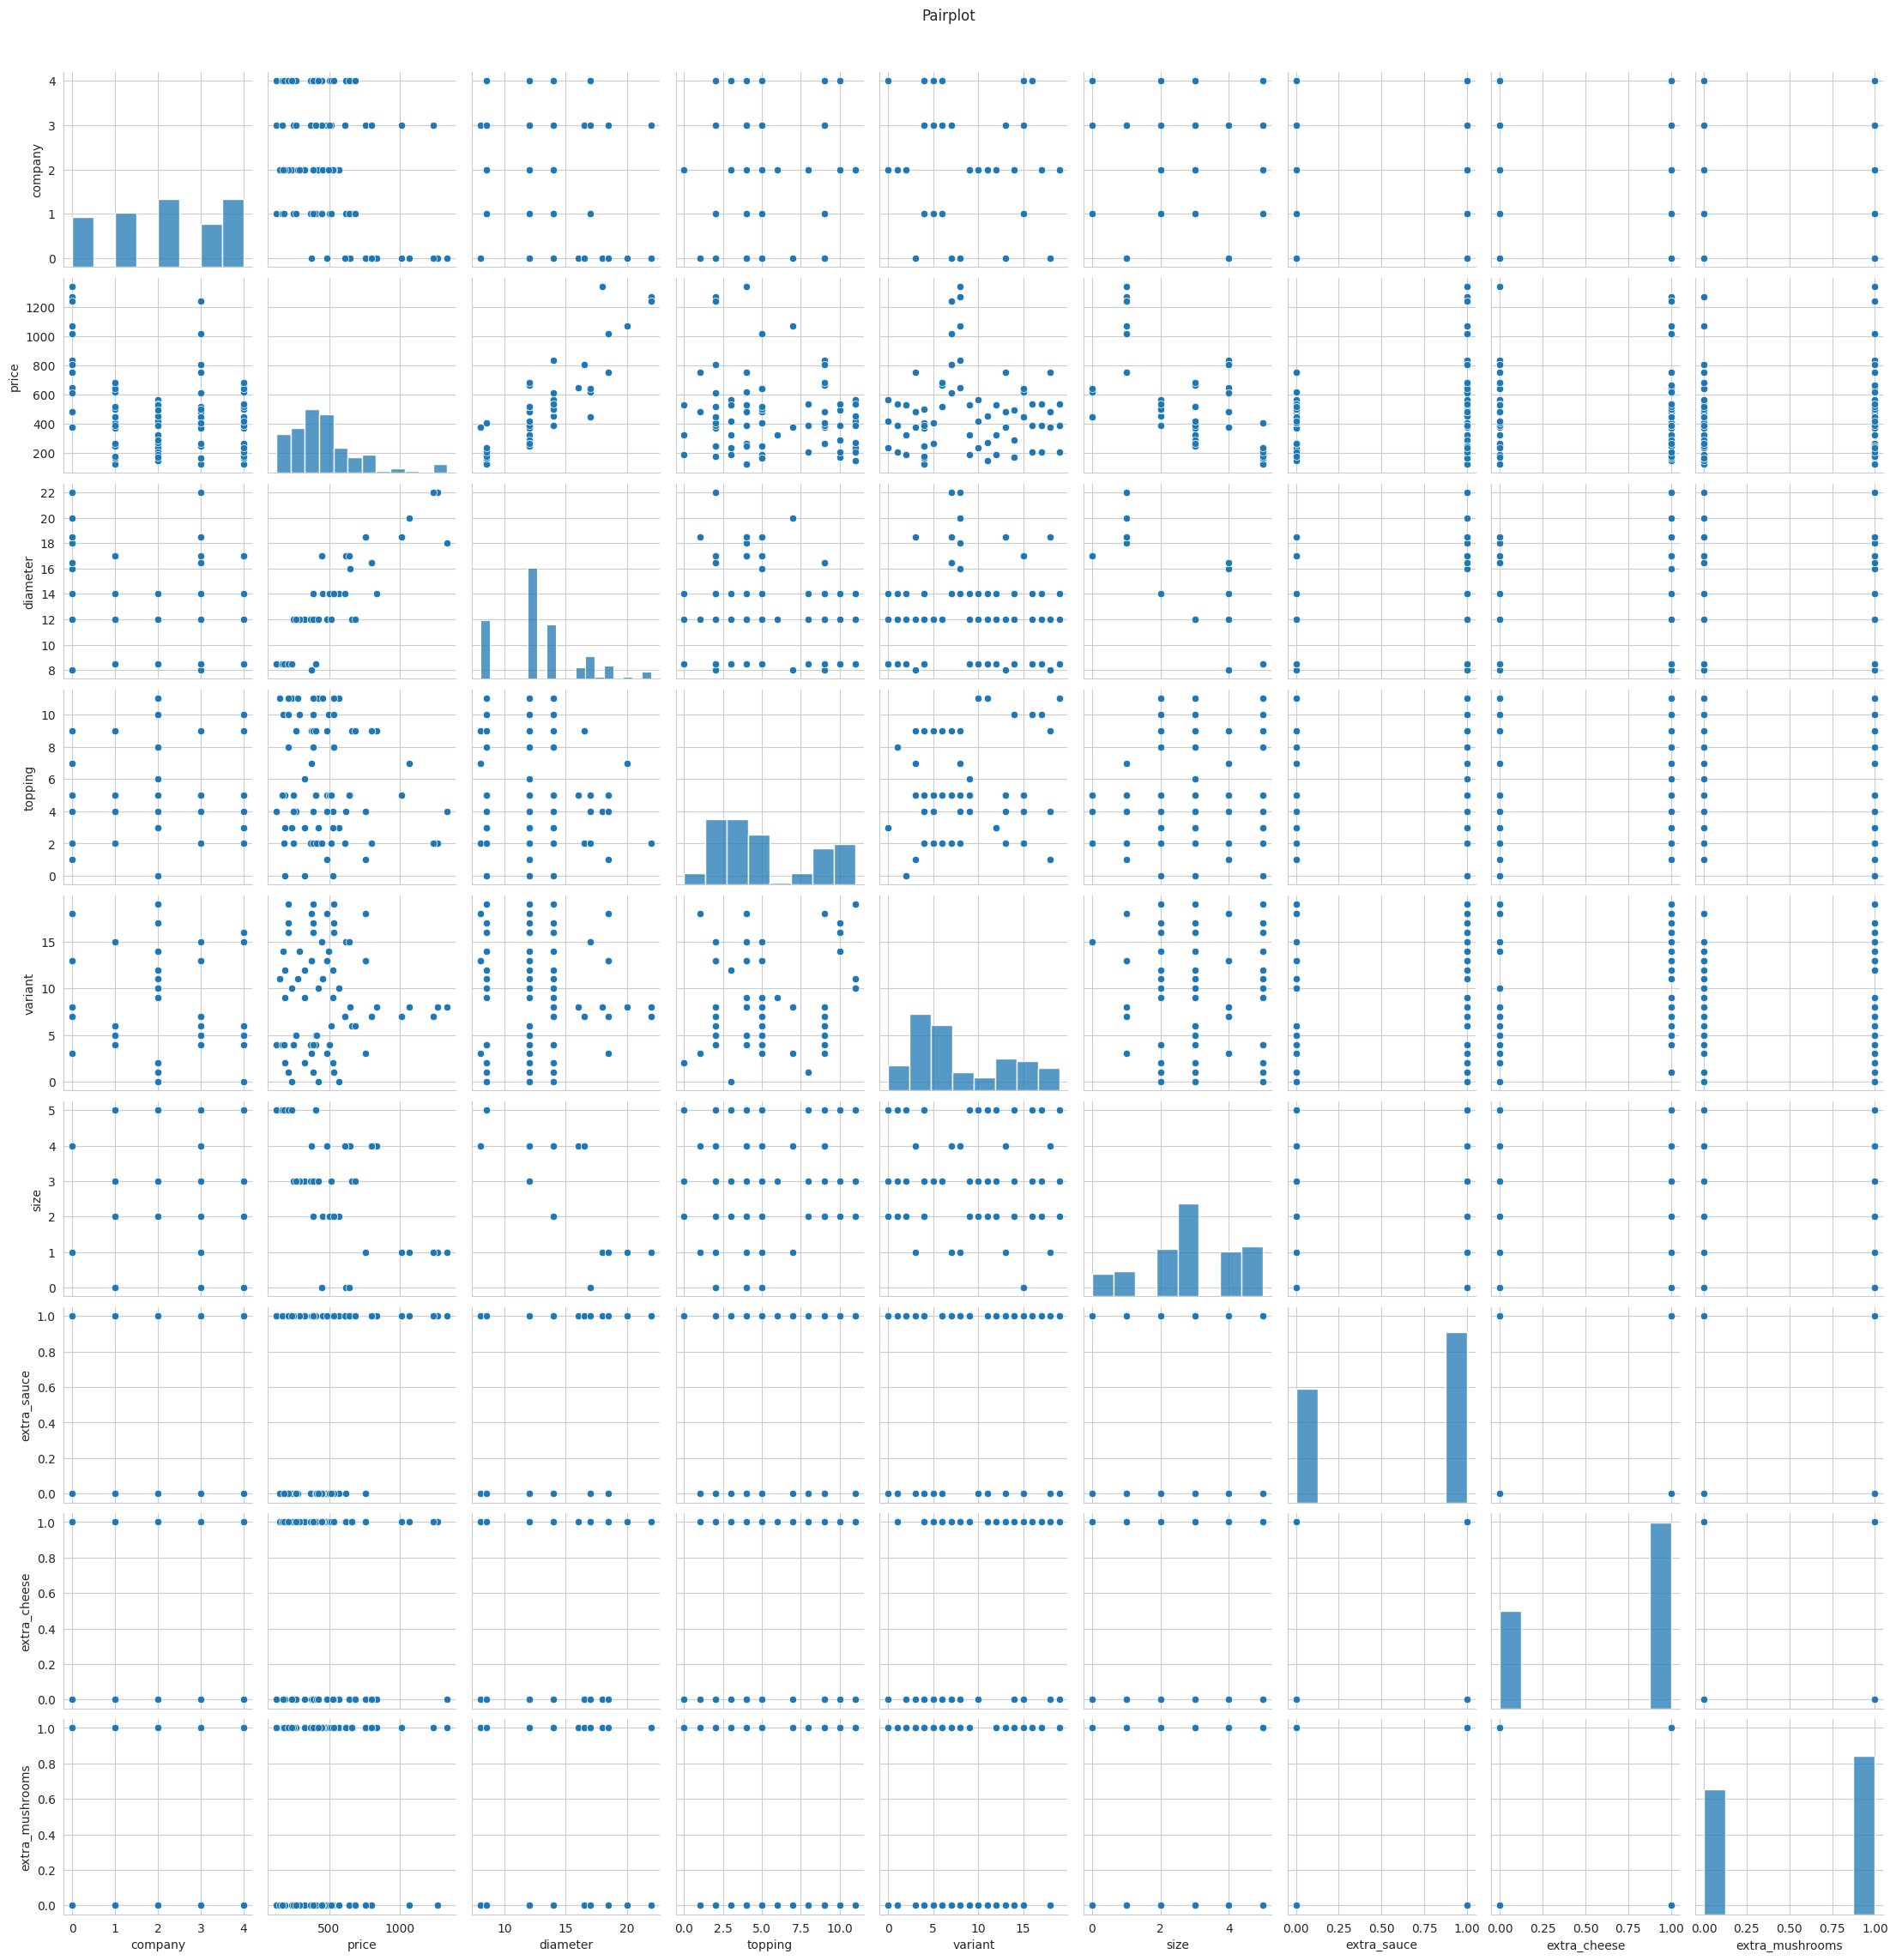

In [43]:

import warnings

# Define the figure size
plt.figure(figsize=(10, 6))

# Use viridis color palette in pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress warnings
    sns.pairplot(df, palette='viridis')  # Apply 'viridis' palette

# Set the title for the pairplot
plt.suptitle('Pairplot', y=1.02)

# Show the plot
plt.show()


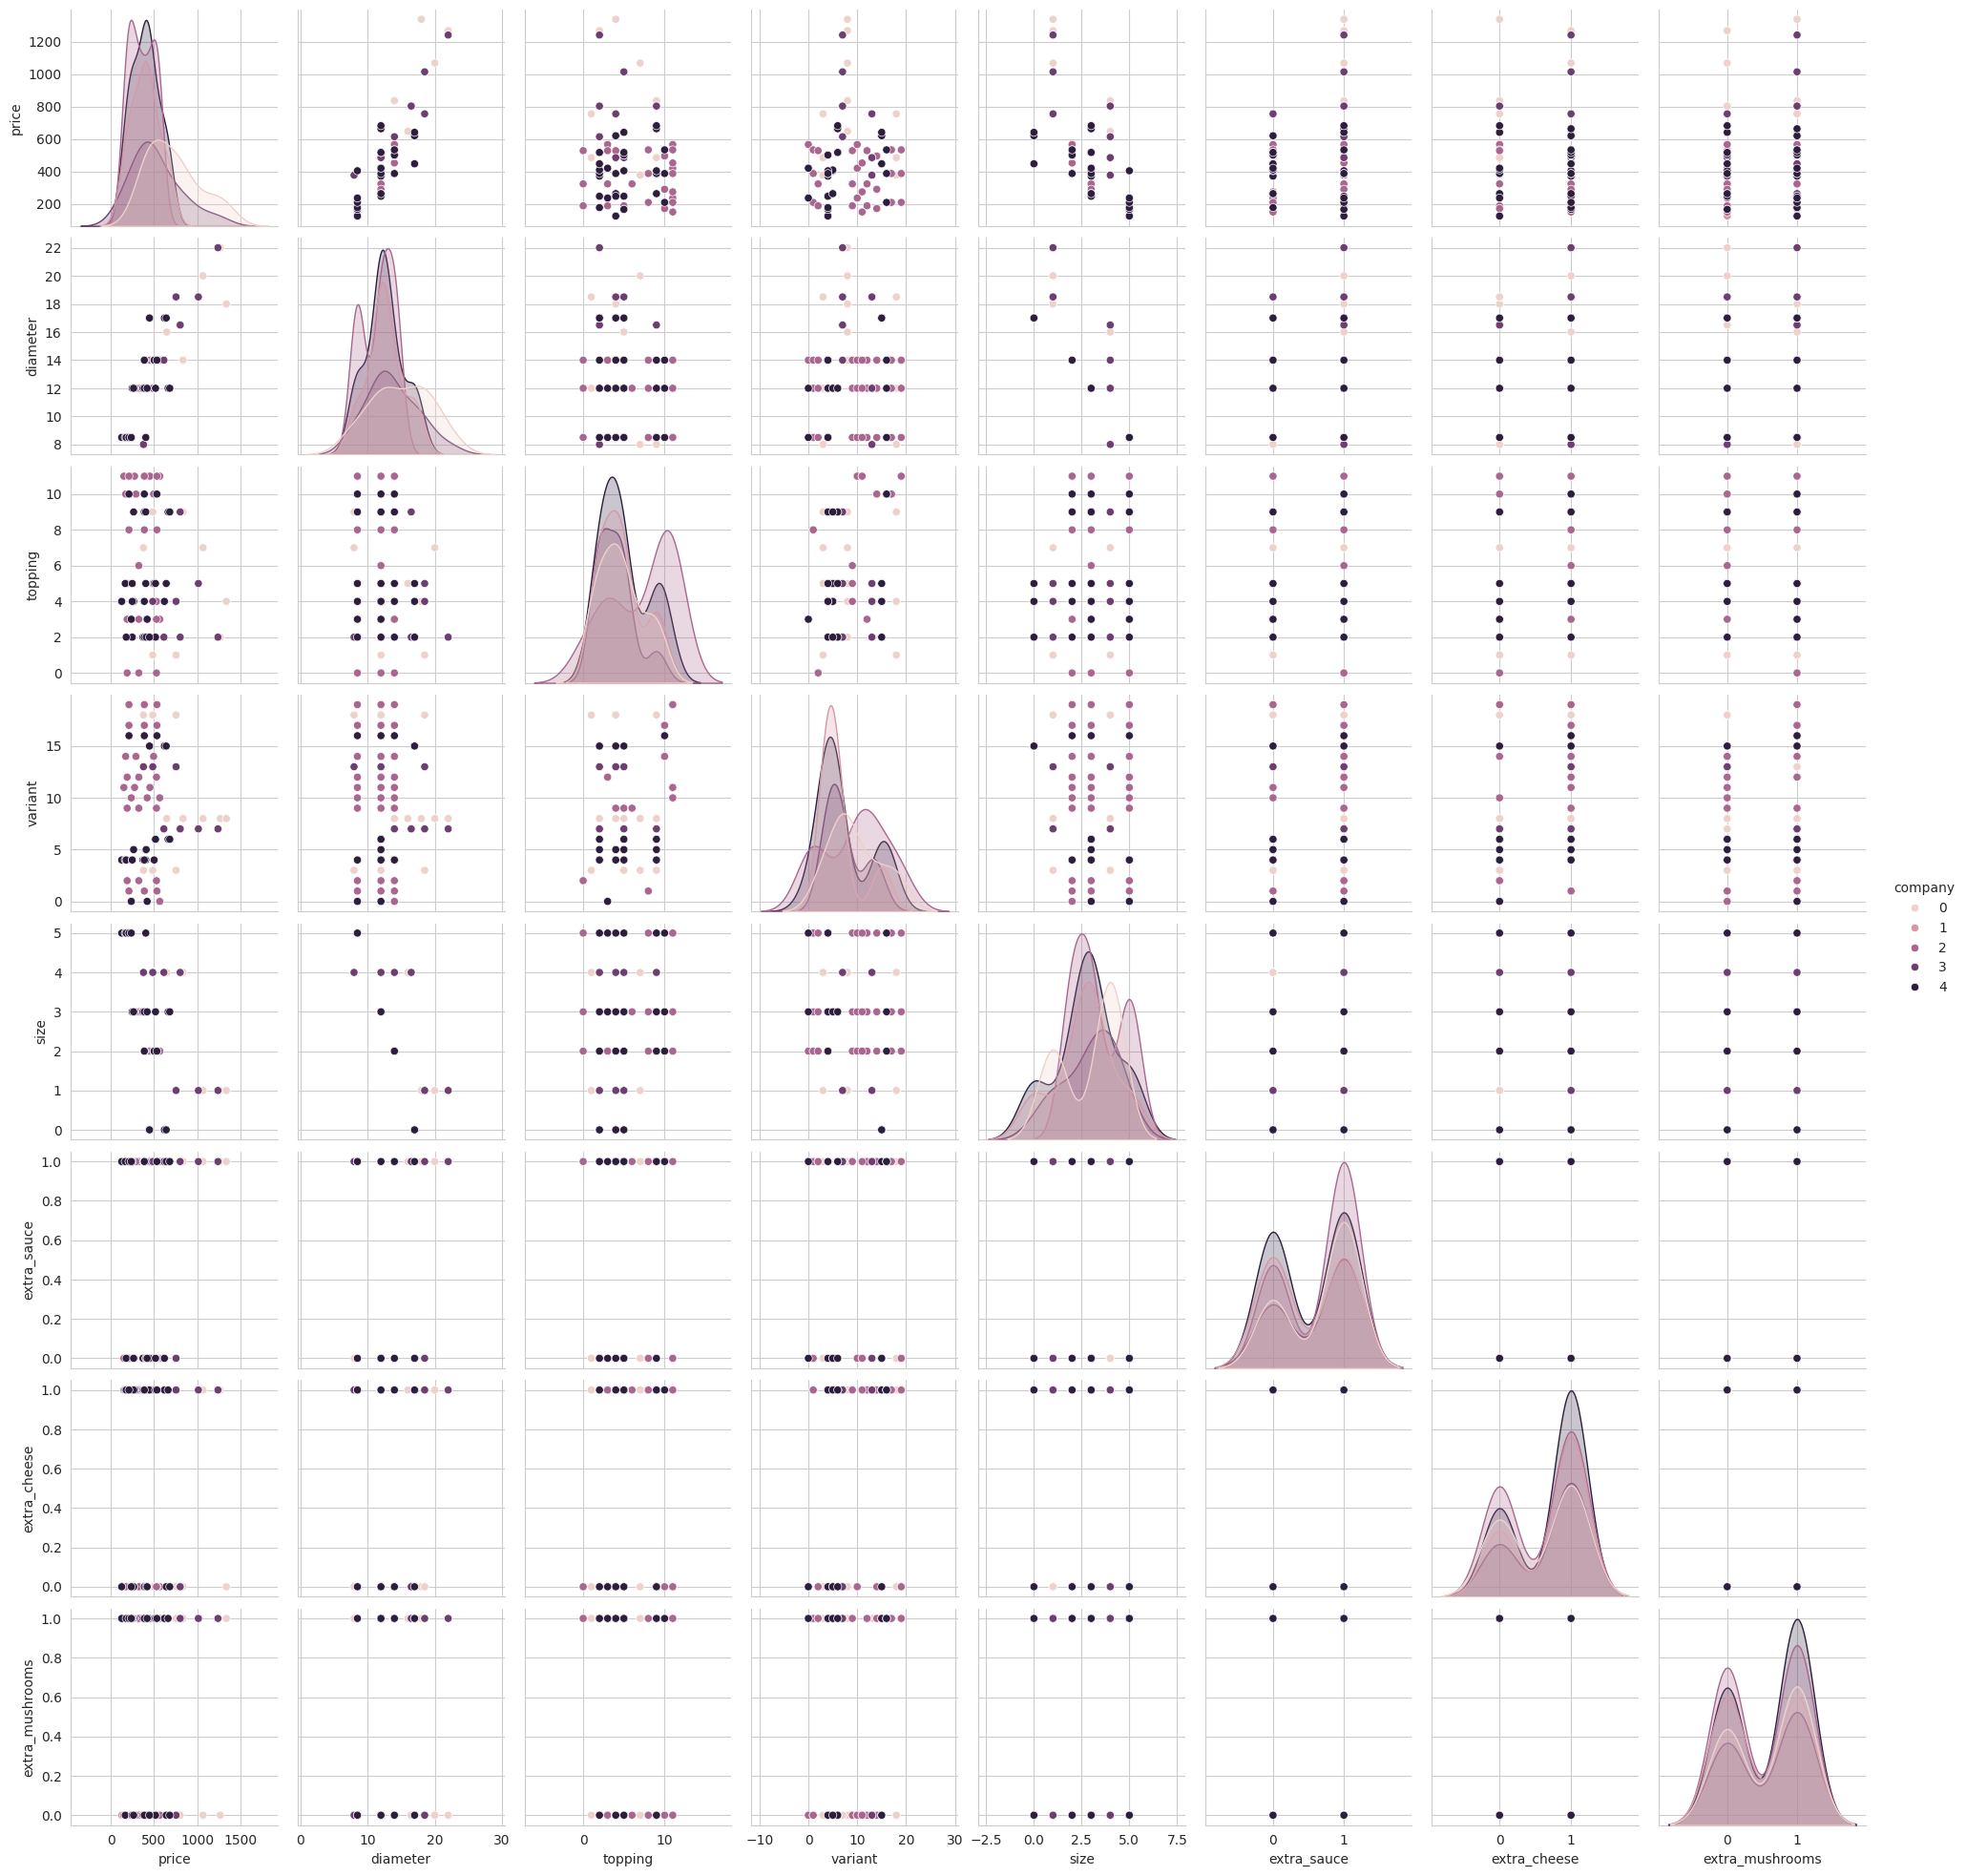

In [44]:
sns.pairplot(df,hue='company')

## STEP 8 : Train Test Splitting

In [45]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          125 non-null    int64  
 1   price            125 non-null    int64  
 2   diameter         125 non-null    float64
 3   topping          125 non-null    int64  
 4   variant          125 non-null    int64  
 5   size             125 non-null    int64  
 6   extra_sauce      125 non-null    int64  
 7   extra_cheese     125 non-null    int64  
 8   extra_mushrooms  125 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 9.8 KB


In [46]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
df.shape

(125, 9)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100,)
(25, 8)
(25,)


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 70 to 106
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          100 non-null    int64  
 1   diameter         100 non-null    float64
 2   topping          100 non-null    int64  
 3   variant          100 non-null    int64  
 4   size             100 non-null    int64  
 5   extra_sauce      100 non-null    int64  
 6   extra_cheese     100 non-null    int64  
 7   extra_mushrooms  100 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 7.0 KB


In [50]:
X_train.describe()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.14,12.830000,5.480000,7.980000,2.960000,0.580000,0.600000,0.610000
std,1.40,3.161655,3.295176,5.200971,1.434918,0.496045,0.492366,0.490207
min,0.00,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00,12.000000,2.750000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.00,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000,1.000000
75%,3.25,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000,1.000000
max,4.00,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000,1.000000


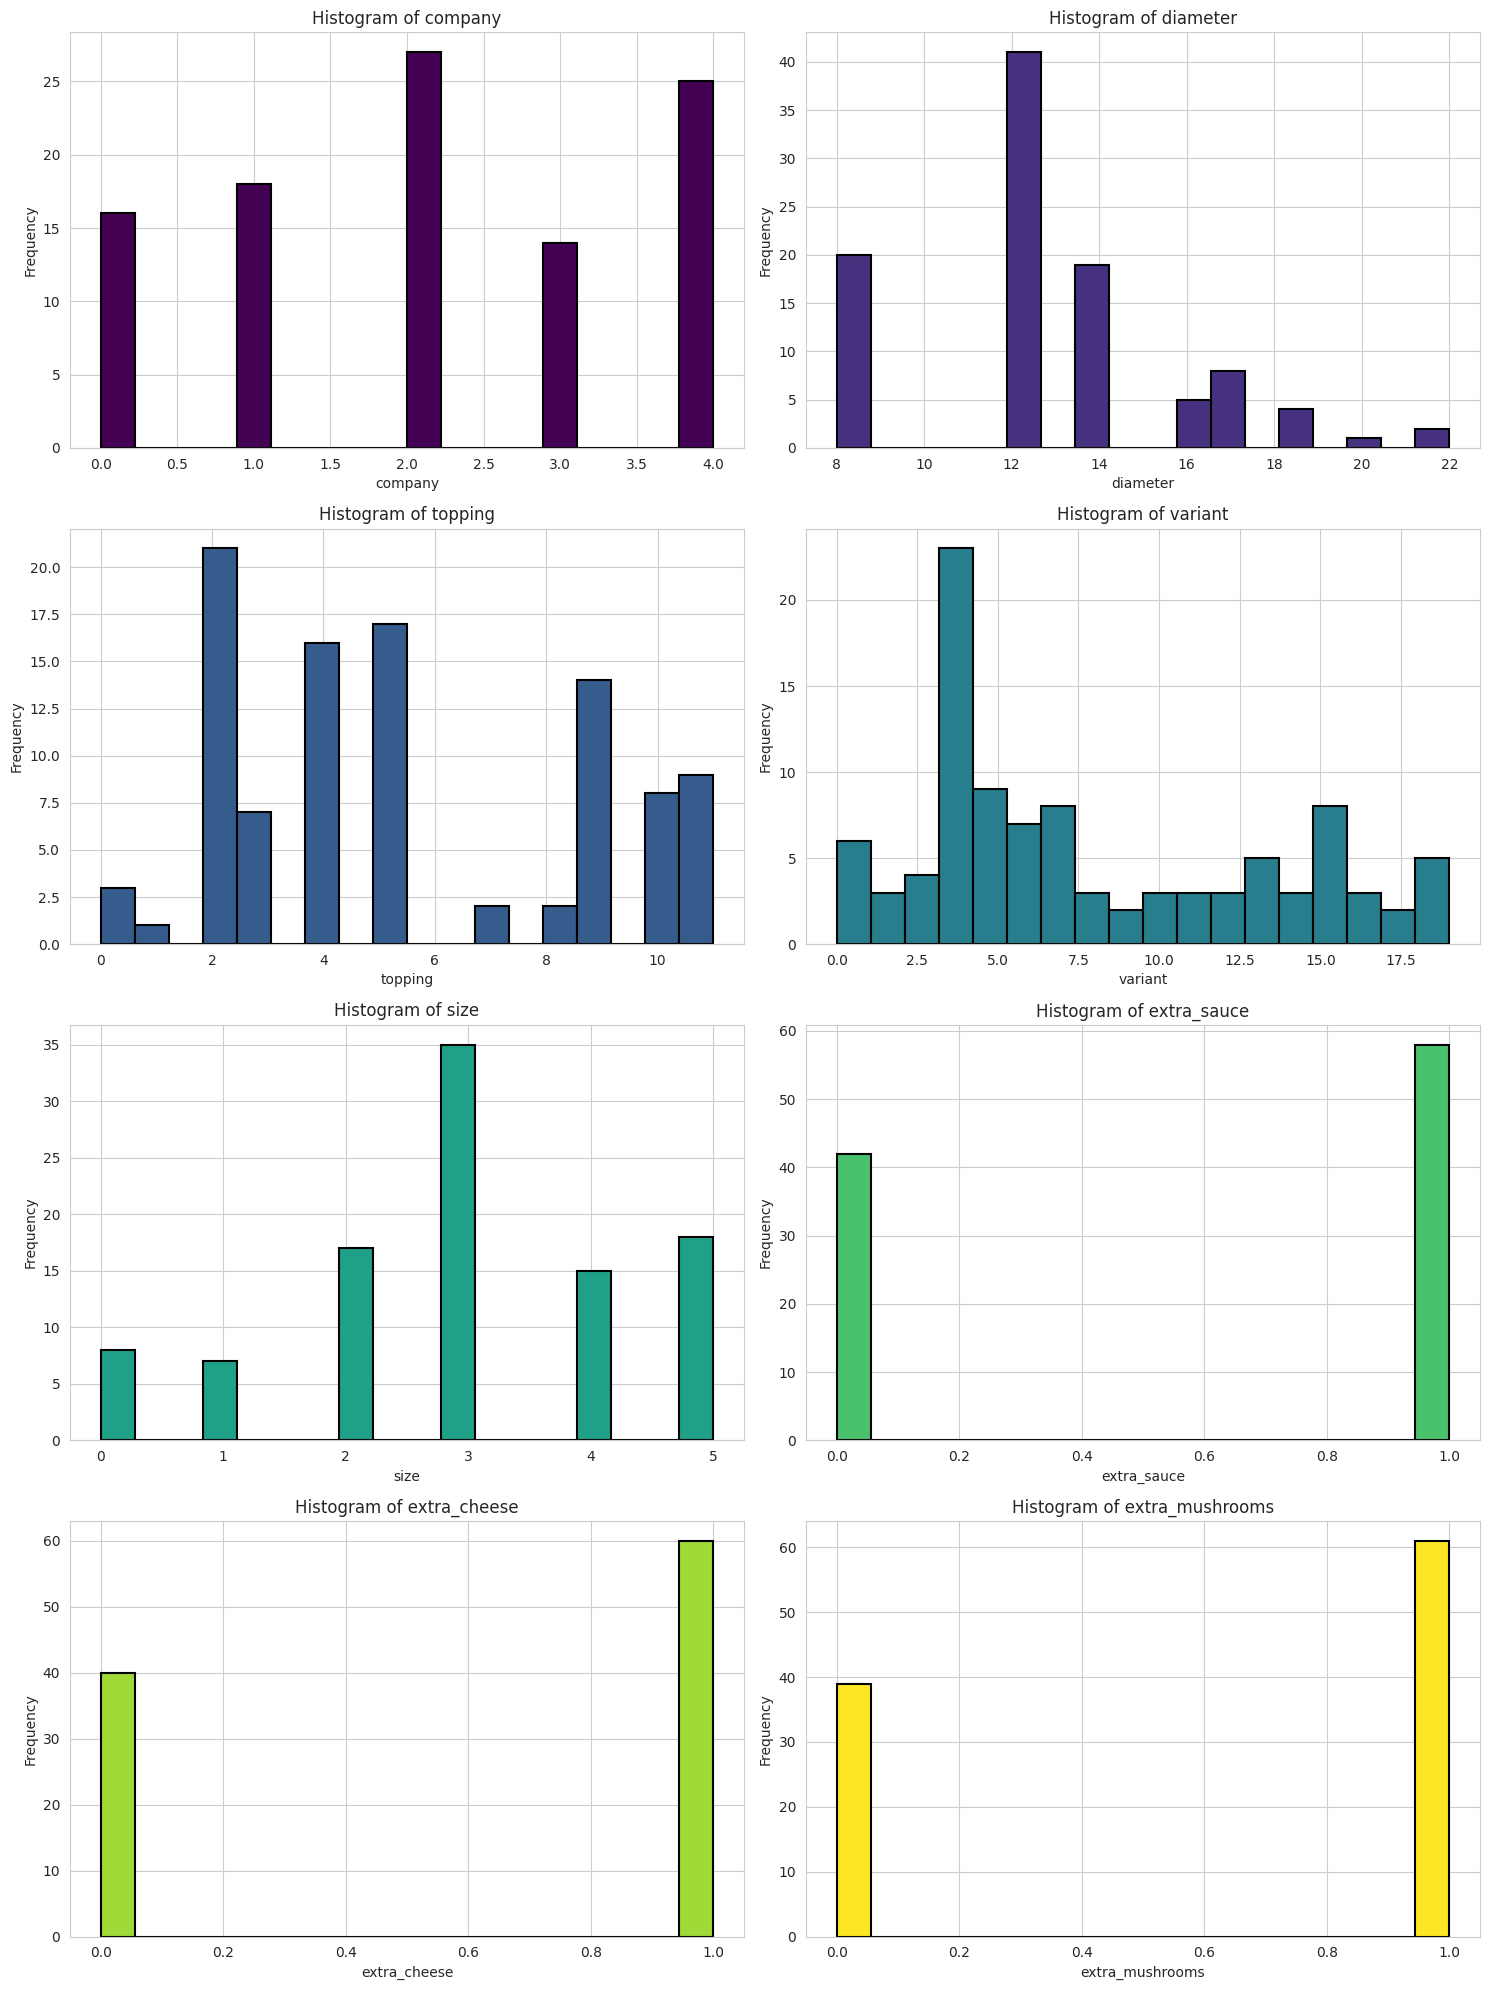

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of bins
n_bins = 18

# Get the 'viridis' colormap with as many colors as there are features
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(X_train.columns)))

# Calculate the number of rows and columns for the subplots
n_features = len(X_train.columns)
n_cols = 2  # Set number of columns, you can adjust this
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows dynamically

# Plotting histograms for each feature
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on number of rows
for i, feature in enumerate(X_train.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot layout dynamically
    plt.hist(X_train[feature], bins=n_bins, color=viridis_colors[i], edgecolor='black', linewidth=1.5)
    plt.title(f'Histogram of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjusting layout and labels
plt.tight_layout()
plt.show()


## STEP 9: Model Creation

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred1 = lr.predict(X_test)

In [54]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [55]:
y_pred2 = svm.predict(X_test)

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
y_pred3 = rf.predict(X_test)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
GRB = GradientBoostingRegressor()
GRB.fit(X_train,y_train)

GradientBoostingRegressor()

In [59]:
y_pred4 =GRB.predict(X_test)

In [60]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [61]:
y_pred5 = DT.predict(X_test)

In [62]:

pip install xgboost==1.6.1 scikit-learn==0.24.2


  Using cached xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [63]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

In [76]:
import xgboost
import sklearn

print(f"XGBoost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


XGBoost version: 2.1.3
scikit-learn version: 1.6.0


In [77]:
pip install xgboost==1.5.2 scikit-learn==0.24.2


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [74]:
# Initialize the XGBRegressor model
XGB = XGBRegressor()

# Train the model using the training data
XGB.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred6 = XGB.predict(X_test)

## Evaluating the Algorithm

In [66]:
from sklearn import metrics

In [67]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)
score6 = metrics.r2_score(y_test, y_pred6)

In [68]:
print(score1,score2,score3,score4,score5,score6)

0.67103151166254 -0.05808641714078622 0.8300554466125342 0.8885624946166706 0.7215908658926928 0.8076059818267822


In [70]:
final_data = pd.DataFrame({'Models':['Linear Regression','SVM','Random Forest','Gradient Boosting','Decision Tree','XGBoost'],
                           'R2_Score':[score1,score2,score3,score4,score5,score6]})

In [71]:
final_data

,Models,R2_Score
0,Linear Regression,0.671032
1,SVM,-0.058086
2,Random Forest,0.830055
3,Gradient Boosting,0.888562
4,Decision Tree,0.721591
5,XGBoost,0.807606


In [80]:
XGB.feature_importances_

array([0.00814003, 0.41583717, 0.0130937 , 0.07641403, 0.41597804,
       0.05530097, 0.00952528, 0.00571077], dtype=float32)

In [82]:
feature = pd.DataFrame({'Features':X_train.columns,'Importance':XGB.feature_importances_})

<Axes: ylabel='Features'>

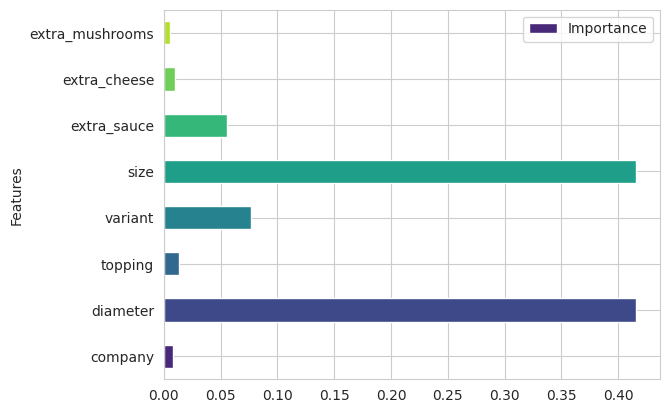

In [84]:

# Use a seaborn color palette (e.g., "Blues" or "viridis")
palette = sns.color_palette("viridis", len(feature))

# Plot the bar chart with the custom color palette
feature.plot(kind='barh', x='Features', y='Importance', color=palette)


In [86]:
GRB.feature_importances_

array([0.00499006, 0.63782075, 0.05325479, 0.10259524, 0.16223345,
       0.03399695, 0.00327009, 0.00183867])

In [93]:
feature1= pd.DataFrame({'Features':X_train.columns,'Importance':GRB.feature_importances_})

<Axes: ylabel='Features'>

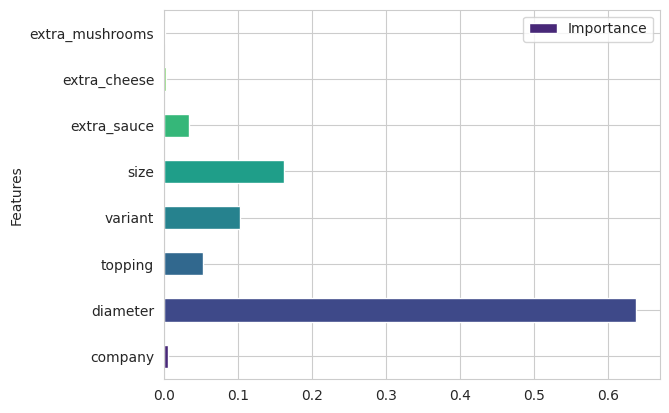

In [94]:

# Use a seaborn color palette (e.g., "Blues" or "viridis")
palette = sns.color_palette("viridis", len(feature))

# Plot the bar chart with the custom color palette
feature1 .plot(kind='barh', x='Features', y='Importance', color=palette)

In [95]:
rf.feature_importances_

array([0.03272855, 0.60895789, 0.03777041, 0.11989554, 0.16480913,
       0.01960891, 0.01148165, 0.00474792])

In [96]:
rf_feature = pd.DataFrame({'Features':X_train.columns,'Importance':rf.feature_importances_})

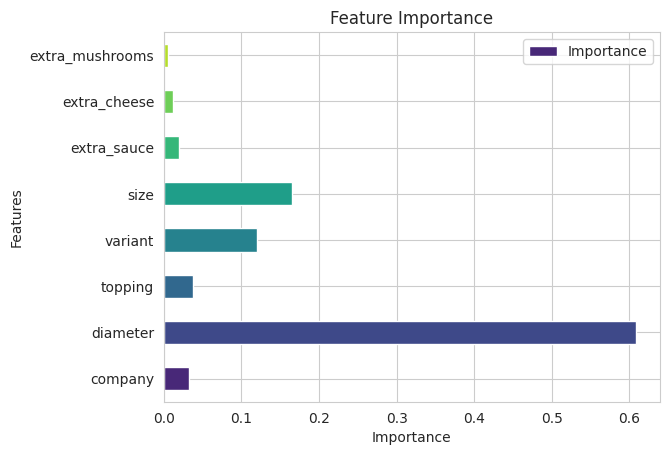

In [99]:
# Create a seaborn color palette (e.g., 'viridis') with as many colors as features
palette = sns.color_palette("viridis", len(rf_feature))

# Plot the bar chart using the custom color palette
rf_feature.plot(kind='barh', x='Features', y='Importance', color=palette)

# Add title and labels for clarity
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.show()

In [100]:
DT.feature_importances_

array([0.01374445, 0.60764611, 0.02395856, 0.12526366, 0.19905042,
       0.0218022 , 0.00457736, 0.00395723])

In [101]:
DT_feature = pd.DataFrame({'Features':X_train.columns,'Importance':DT.feature_importances_})

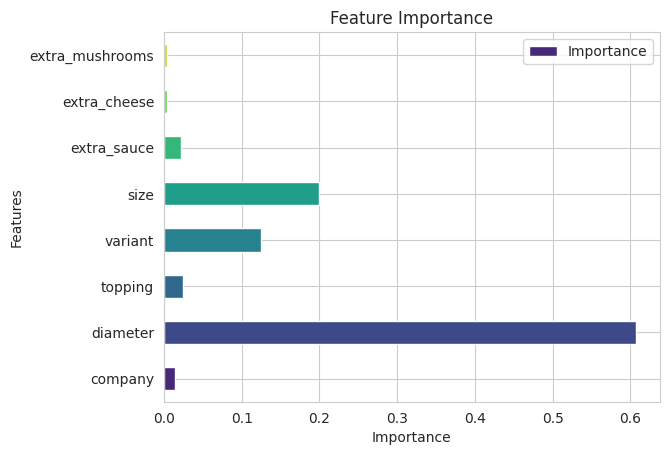

In [102]:
# Create a seaborn color palette (e.g., 'viridis') with as many colors as features
palette = sns.color_palette("viridis", len(rf_feature))

# Plot the bar chart using the custom color palette
DT_feature.plot(kind='barh', x='Features', y='Importance', color=palette)

# Add title and labels for clarity
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.show()

## STEP 10: Selecting the Best Model